In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
try:
    df = pd.read_csv('../data/external/MachineLearningRating_v3.txt',sep='|')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Ensure your data file is in the correct path.")
df.head()

/tmp/ipykernel_103308/2059471405.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/external/MachineLearningRating_v3.txt',sep='|')


Data loaded successfully.


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:
print("\n--- Data Structure ---")
print(df.info())

# Transaction date is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
print("\n'TransactionMonth' converted to datetime.")


--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    


Overall Portfolio Loss Ratio: 1.0477

--- Loss Ratio by Province ---
                TotalClaims  TotalPremium  LossRatio
Province                                            
Gauteng        2.939415e+07  2.405377e+07   1.222018
KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
Western Cape   1.038977e+07  9.806559e+06   1.059472
North West     5.920250e+06  7.490508e+06   0.790367
Mpumalanga     2.044675e+06  2.836292e+06   0.720897
Free State     3.549223e+05  5.213632e+05   0.680758
Limpopo        1.016477e+06  1.537324e+06   0.661199
Eastern Cape   1.356427e+06  2.140104e+06   0.633813
Northern Cape  8.949051e+04  3.165581e+05   0.282699

--- Loss Ratio by Gender ---
                TotalClaims  TotalPremium  LossRatio
Gender                                              
Not specified  6.271410e+07  5.920275e+07   1.059311
Male           1.396704e+06  1.580143e+06   0.883910
Female         2.502461e+05  3.044806e+05   0.821879


/tmp/ipykernel_103308/2875833822.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y=loss_ratio_province.index, data=loss_ratio_province.reset_index(), palette="viridis")


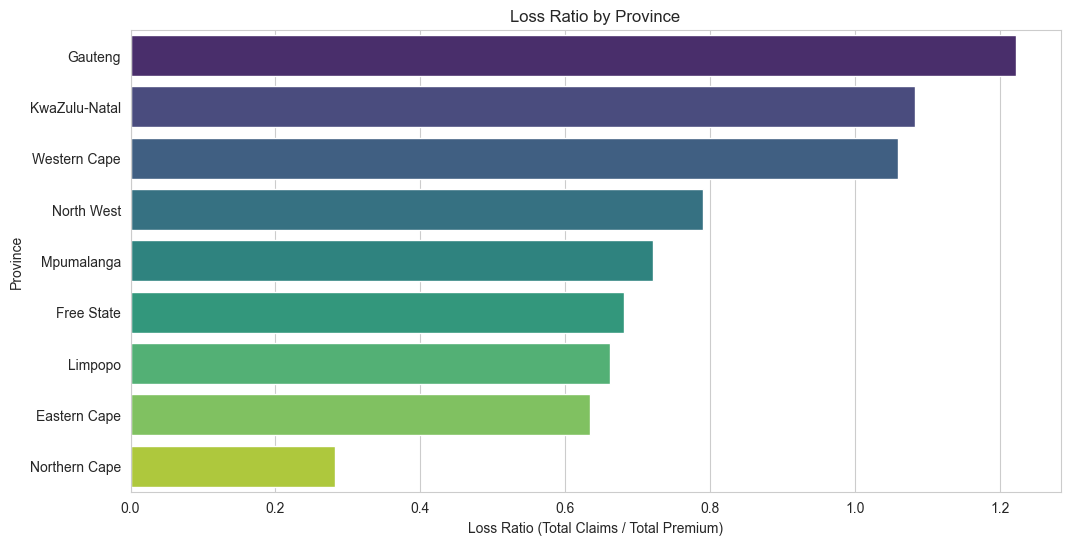

In [ ]:
## Overall Loss Ratio 
total_claims_all = df['TotalClaims'].sum()
total_premium_all = df['TotalPremium'].sum()
overall_loss_ratio = total_claims_all / total_premium_all
print(f"\nOverall Portfolio Loss Ratio: {overall_loss_ratio:.4f}")

## Loss Ratio by Feature (Province, VehicleType, Gender) 
def calculate_loss_ratio_by_group(df, group_col):
    # Group by the specified column and sum up TotalClaims and TotalPremium
    grouped = df.groupby(group_col)[['TotalClaims', 'TotalPremium']].sum()
    
    # Calculate Loss Ratio
    grouped['LossRatio'] = grouped['TotalClaims'] / grouped['TotalPremium']

    return grouped.sort_values(by='LossRatio', ascending=False)

# Loss Ratio by Province
loss_ratio_province = calculate_loss_ratio_by_group(df, 'Province')
print("\n--- Loss Ratio by Province ---")
print(loss_ratio_province)

# Loss Ratio by Gender
loss_ratio_gender = calculate_loss_ratio_by_group(df, 'Gender')
print("\n--- Loss Ratio by Gender ---")
print(loss_ratio_gender)

# Plot Loss Ratio by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='LossRatio', y=loss_ratio_province.index, data=loss_ratio_province.reset_index(), palette="viridis")
plt.title('Loss Ratio by Province')
plt.xlabel('Loss Ratio (Total Claims / Total Premium)')
plt.ylabel('Province')
plt.show()

/tmp/ipykernel_103308/3250480077.py:7: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, df['TotalClaims'].quantile(0.99))


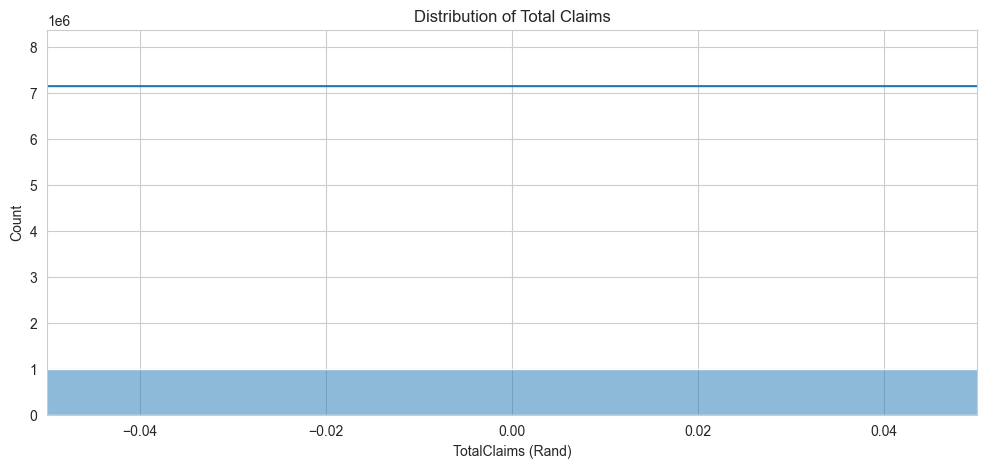

In [20]:
## Univariate Analysis (Distribution of TotalClaims) 
# Plot histogram for numerical columns
plt.figure(figsize=(12, 5))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of Total Claims')
plt.xlabel('TotalClaims (Rand)')
plt.xlim(0, df['TotalClaims'].quantile(0.99)) 
plt.show()

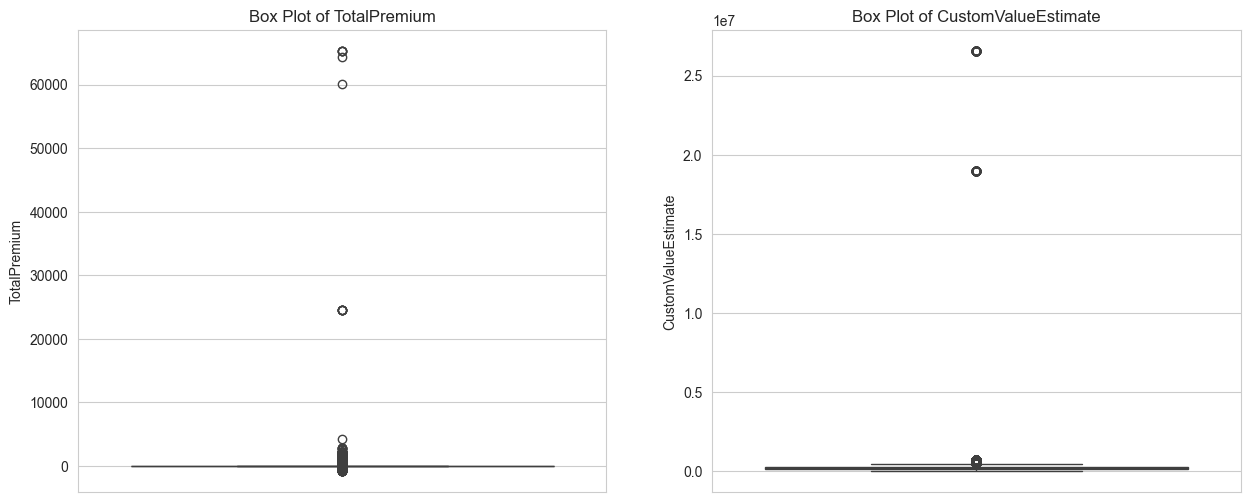

In [ ]:
## Outlier Detection (TotalPremium and CustomValueEstimate) 
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['TotalPremium'])
plt.title('Box Plot of TotalPremium')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['CustomValueEstimate'])
plt.title('Box Plot of CustomValueEstimate')
plt.show() 

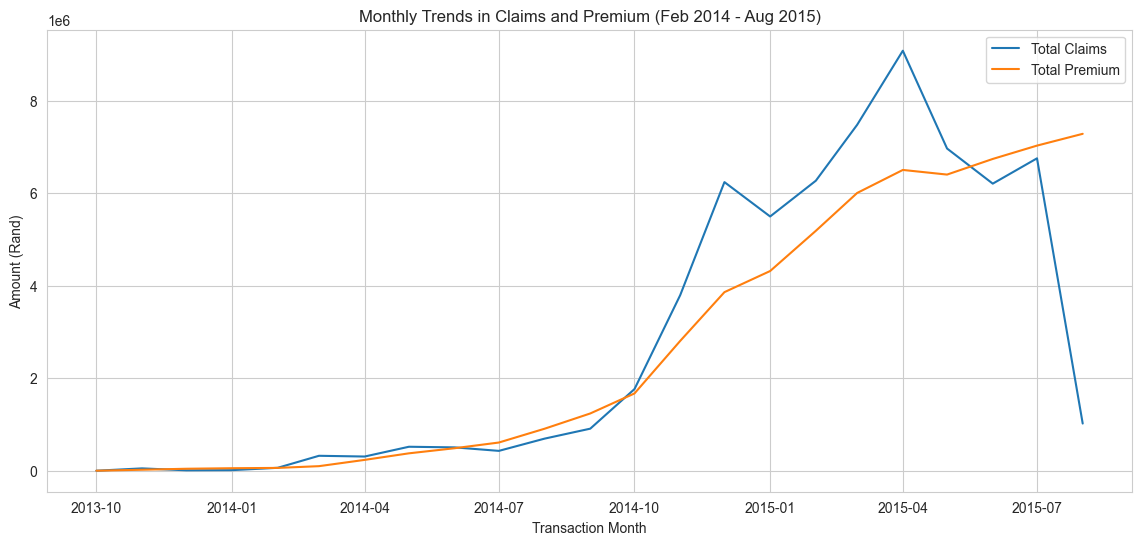

In [18]:
## Temporal Trends 
monthly_data = df.groupby('TransactionMonth')[['TotalClaims', 'TotalPremium']].sum()

plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['TotalClaims'], label='Total Claims')
plt.plot(monthly_data.index, monthly_data['TotalPremium'], label='Total Premium')
plt.title('Monthly Trends in Claims and Premium (Feb 2014 - Aug 2015)')
plt.xlabel('Transaction Month')
plt.ylabel('Amount (Rand)')
plt.legend()
plt.show()

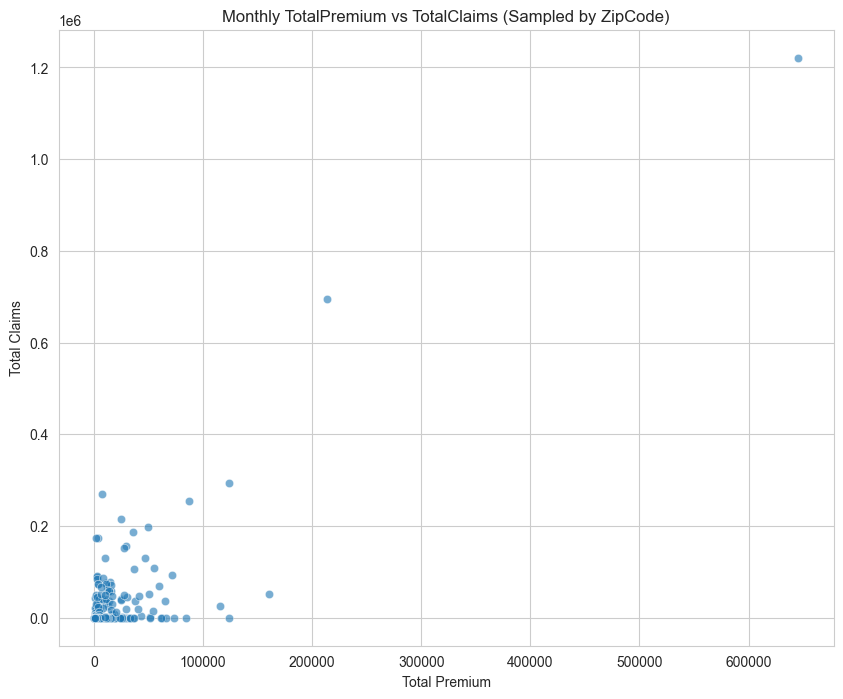

In [ ]:
## Bivariate Analysis (TotalPremium vs TotalClaims Correlation) 
# Create a scatter plot of monthly changes
monthly_zip_data = df.groupby(['TransactionMonth', 'PostalCode'])[['TotalPremium', 'TotalClaims']].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=monthly_zip_data.sample(n=1000, random_state=42), alpha=0.6)
plt.title('Monthly TotalPremium vs TotalClaims (Sampled by ZipCode)')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()